<a href="https://colab.research.google.com/github/Billypeng1231/107-2-Multimedia/blob/master/Keras_Mnist_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras.datasets import mnist
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

In [0]:
(x_Train, y_Train), (x_Test, y_Test) = mnist.load_data()

x_Train4D=x_Train.reshape(x_Train.shape[0],28,28,1).astype('float32')
x_Test4D=x_Test.reshape(x_Test.shape[0],28,28,1).astype('float32')

x_Train4D_normalize = x_Train4D / 255
x_Test4D_normalize = x_Test4D / 255

y_TrainOneHot = np_utils.to_categorical(y_Train)
y_TestOneHot = np_utils.to_categorical(y_Test)

In [0]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D

model = Sequential()

model.add(Conv2D(filters = 16,
                 kernel_size = (5,5),
                 padding = 'same',
                 input_shape = (28,28,1),
                 activation = 'relu'))

In [7]:
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(filters = 36,
                 kernel_size = (5,5),
                 padding = 'same',
                 activation = 'relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [16]:
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation = 'softmax'))
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 16)        416       
_________________________________________________________________
flatten_6 (Flatten)          (None, 12544)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               1605760   
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 1,607,466
Trainable params: 1,607,466
Non-trainable params: 0
_________________________________________________________________
None


In [17]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',metrics=['accuracy'])

train_history=model.fit(x=x_Train4D_normalize,
                        y=y_TrainOneHot,validation_split=0.2,
                        epochs=20,batch_size=300,verbose=2)

Instructions for updating:
Use tf.cast instead.
Train on 48000 samples, validate on 12000 samples
Epoch 1/20
 - 39s - loss: 0.3907 - acc: 0.8835 - val_loss: 0.1192 - val_acc: 0.9665
Epoch 2/20
 - 38s - loss: 0.1495 - acc: 0.9549 - val_loss: 0.0802 - val_acc: 0.9762
Epoch 3/20
 - 38s - loss: 0.1039 - acc: 0.9685 - val_loss: 0.0667 - val_acc: 0.9795
Epoch 4/20
 - 38s - loss: 0.0834 - acc: 0.9747 - val_loss: 0.0588 - val_acc: 0.9818
Epoch 5/20
 - 38s - loss: 0.0707 - acc: 0.9783 - val_loss: 0.0574 - val_acc: 0.9834
Epoch 6/20
 - 38s - loss: 0.0600 - acc: 0.9814 - val_loss: 0.0503 - val_acc: 0.9847
Epoch 7/20
 - 38s - loss: 0.0530 - acc: 0.9841 - val_loss: 0.0523 - val_acc: 0.9855
Epoch 8/20
 - 38s - loss: 0.0480 - acc: 0.9850 - val_loss: 0.0501 - val_acc: 0.9844
Epoch 9/20
 - 38s - loss: 0.0410 - acc: 0.9869 - val_loss: 0.0501 - val_acc: 0.9856
Epoch 10/20
 - 38s - loss: 0.0392 - acc: 0.9875 - val_loss: 0.0469 - val_acc: 0.9868
Epoch 11/20
 - 38s - loss: 0.0356 - acc: 0.9886 - val_loss: 0

In [0]:
import matplotlib.pyplot as plt
def show_train_history(train_acc,test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train','test'], loc='upper left')
    plt.show()

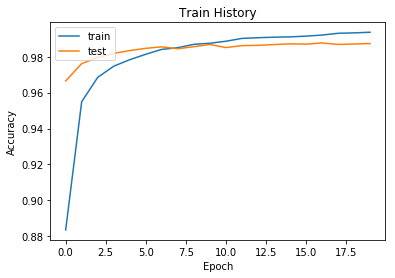

In [21]:
show_train_history('acc','val_acc')

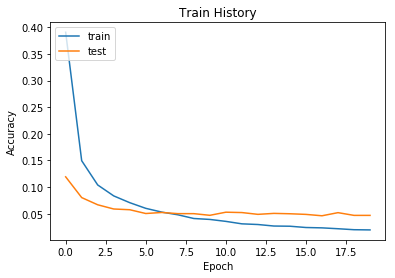

In [22]:
show_train_history('loss','val_loss')

In [23]:
scores = model.evaluate(x_Test4D_normalize , y_TestOneHot)
scores[1]

10000/10000 [==============================] - 5s 465us/step


0.9884

In [24]:
prediction=model.predict_classes(x_Test4D_normalize)
prediction[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

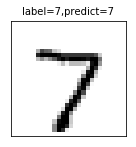

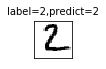

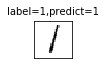

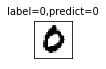

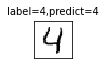

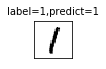

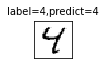

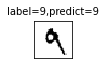

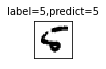

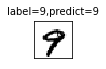

In [26]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images,labels,prediction,idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num >25: num = 25
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx], cmap='binary')
        
        ax.set_title("label=" + str(labels[idx])+
                     ",predict="+str(prediction[idx])
                     ,fontsize=10)
        
        ax.set_xticks([]);ax.set_yticks([])
        idx+=1
        plt.show()
        
plot_images_labels_prediction(x_Test,y_Test,prediction,idx=0)

In [27]:
import pandas as pd
pd.crosstab(y_Test,prediction,
            rownames=['label'],colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,976,1,0,0,0,0,1,1,1,0
1,0,1129,2,2,0,0,1,0,1,0
2,1,0,1019,3,0,0,0,5,4,0
3,0,0,0,1003,0,4,0,0,3,0
4,0,0,0,0,971,0,2,0,0,9
5,2,0,0,6,0,880,3,0,1,0
6,3,2,1,0,1,4,946,0,1,0
7,1,1,6,3,0,0,0,1013,2,2
8,4,0,4,2,1,2,0,2,954,5


In [28]:
df = pd.DataFrame({'label':y_Test,'predict':prediction})

df[(df.label==5)&(df.predict==3)]

,label,predict
340,5,3
1393,5,3
2035,5,3
2597,5,3
4360,5,3
5937,5,3
